# CNA (thresholded) vs Z-Score (filtered) Box-Plot

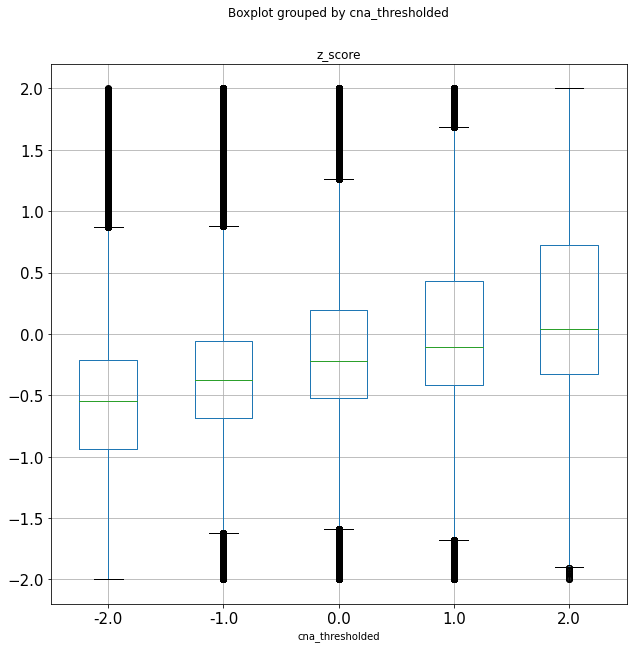

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

processed_data_dir = "../data/processed"

cna_thresholded = pd.concat(
    [pd.read_csv(os.path.join(processed_data_dir, cancer_type, "cna_thresholded.tsv"), sep="\t") for cancer_type in ["blca", "lusc", "ov"]],
    axis=0
)

gex = pd.concat(
    [pd.read_csv(os.path.join(processed_data_dir, cancer_type, "gex.tsv"), sep="\t") for cancer_type in ["blca", "lusc", "ov"]],
    axis=0
)

intersecting_sample_ids = sorted(list(set(cna_thresholded["sample_id"].values).intersection(set(gex["sample_id"].values))))
intersecting_gene_ids = sorted(list(set(cna_thresholded.columns).intersection(set(gex.columns))))

cna_thresholded = cna_thresholded[cna_thresholded["sample_id"].isin(intersecting_sample_ids)][intersecting_gene_ids].drop(columns=["sample_id"]).values
gex = gex[gex["sample_id"].isin(intersecting_sample_ids)][intersecting_gene_ids].drop(columns=["sample_id"]).values
z_scores = (gex - gex.mean(axis=0)) / gex.std(axis=0)

cna_thresholded_1d = cna_thresholded.ravel()
z_scores_1d = z_scores.ravel()

cna_thresholded_1d_filtered = [cna_thresholded_1d_i for index, cna_thresholded_1d_i in enumerate(cna_thresholded_1d) if z_scores_1d[index] > -2 and z_scores_1d[index] < 2]
z_scores_1d_filtered = [z_scores_1d_i for index, z_scores_1d_i in enumerate(z_scores_1d) if z_scores_1d[index] > -2 and z_scores_1d[index] < 2]

df = pd.DataFrame.from_dict({"cna_thresholded": cna_thresholded_1d_filtered,
                             "z_score": z_scores_1d_filtered})

df.boxplot(column="z_score", by="cna_thresholded", figsize=(10, 10), fontsize=15)
plt.show();


# Distribution of Pearson Correlation between Median Z-Score (Filtered) and CNA (Thresholded) per Gene

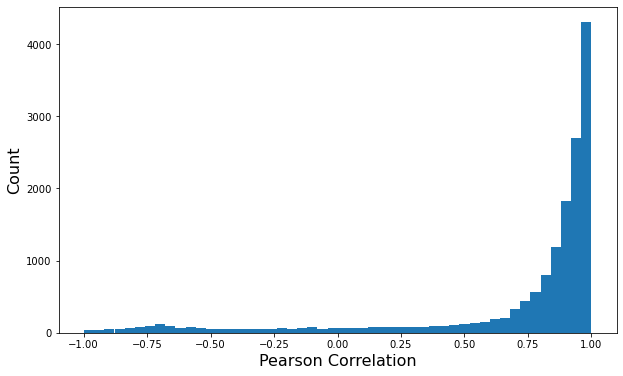

In [22]:
import os
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr


processed_data_dir = "../data/processed"

cna = pd.concat(
    [pd.read_csv(os.path.join(processed_data_dir, cancer_type, "cna_thresholded.tsv"), sep="\t") for cancer_type in ["blca"]],
    axis=0
)

gex = pd.concat(
    [pd.read_csv(os.path.join(processed_data_dir, cancer_type, "gex.tsv"), sep="\t") for cancer_type in ["blca"]],
    axis=0
)

intersecting_sample_ids = sorted(list(set(cna["sample_id"].values).intersection(set(gex["sample_id"].values))))
intersecting_gene_ids = sorted(list(set(cna.columns.tolist()).intersection(gex.columns.tolist())))

cna = cna[cna["sample_id"].isin(intersecting_sample_ids)][intersecting_gene_ids].drop(columns=["sample_id"]).values
gex = gex[gex["sample_id"].isin(intersecting_sample_ids)][intersecting_gene_ids].drop(columns=["sample_id"]).values
z_scores = (gex - gex.mean(axis=0)) / gex.std(axis=0)

corrs = []
for i in range(cna.shape[1]):
    cna_i = cna[:, i]
    z_scores_i = z_scores[:, i]
    current_df = pd.DataFrame.from_dict({"cna": cna_i, "z_score": z_scores_i})
    current_df = current_df.groupby("cna").agg({"z_score": "median"}).reset_index(drop=False)
    corr = pearsonr(current_df["z_score"].values, current_df["cna"].values)[0]
    corrs.append(corr)

plt.figure(figsize=(10, 6))
plt.hist(corrs, bins=50)
plt.xlabel("Pearson Correlation", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.show();


# Distribution of Pearson Correlation between Median Z-Score (Filtered) and CNA per Gene

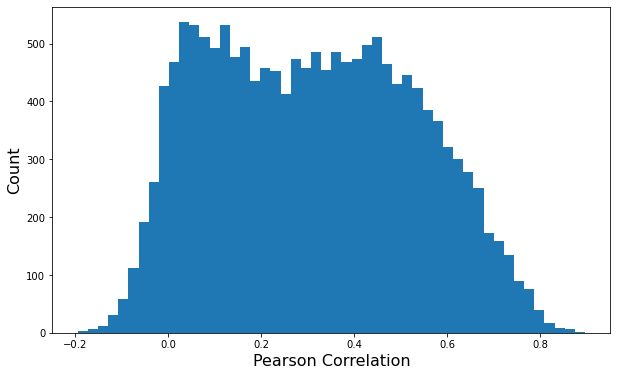

In [21]:
import os
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr


processed_data_dir = "../data/processed"

cna = pd.concat(
    [pd.read_csv(os.path.join(processed_data_dir, cancer_type, "cna.tsv"), sep="\t") for cancer_type in ["blca"]],
    axis=0
)

gex = pd.concat(
    [pd.read_csv(os.path.join(processed_data_dir, cancer_type, "gex.tsv"), sep="\t") for cancer_type in ["blca"]],
    axis=0
)

intersecting_sample_ids = sorted(list(set(cna["sample_id"].values).intersection(set(gex["sample_id"].values))))
intersecting_gene_ids = sorted(list(set(cna.columns.tolist()).intersection(gex.columns.tolist())))

cna = cna[cna["sample_id"].isin(intersecting_sample_ids)][intersecting_gene_ids].drop(columns=["sample_id"]).values
gex = gex[gex["sample_id"].isin(intersecting_sample_ids)][intersecting_gene_ids].drop(columns=["sample_id"]).values
z_scores = (gex - gex.mean(axis=0)) / gex.std(axis=0)

corrs = []
for i in range(cna.shape[1]):
    cna_i = cna[:, i]
    z_scores_i = z_scores[:, i]
    current_df = pd.DataFrame.from_dict({"cna": cna_i, "z_score": z_scores_i})
    corr = pearsonr(current_df["z_score"].values, current_df["cna"].values)[0]
    corrs.append(corr)

plt.figure(figsize=(10, 6))
plt.hist(corrs, bins=50)
plt.xlabel("Pearson Correlation", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.show();


# CNA (not thresholded) vs Z-Score (not filtered) Scatter Plot

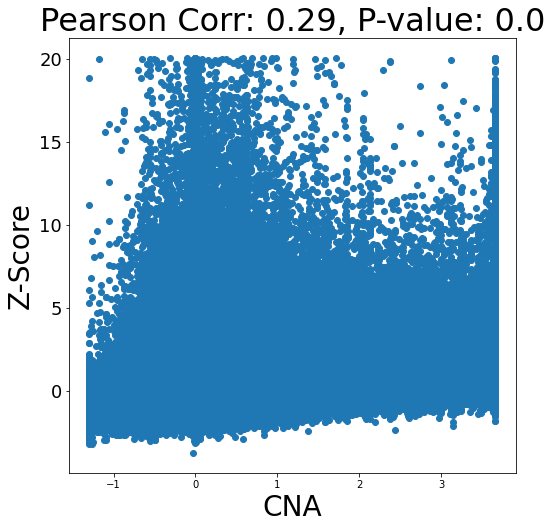

In [15]:
import os
import numpy as np
from scipy.stats import pearsonr
import pandas as pd
import matplotlib.pyplot as plt


processed_data_dir = "../data/processed"

cna = pd.concat(
    [pd.read_csv(os.path.join(processed_data_dir, cancer_type, "cna.tsv"), sep="\t") for cancer_type in ["blca", "lusc", "ov"]],
    axis=0
)

gex = pd.concat(
    [pd.read_csv(os.path.join(processed_data_dir, cancer_type, "gex.tsv"), sep="\t") for cancer_type in ["blca", "lusc", "ov"]],
    axis=0
)

intersecting_sample_ids = sorted(list(set(cna["sample_id"].values).intersection(set(gex["sample_id"].values))))
intersecting_gene_ids = sorted(list(set(cna.columns.tolist()).intersection(gex.columns.tolist())))

cna = cna[cna["sample_id"].isin(intersecting_sample_ids)][intersecting_gene_ids].drop(columns=["sample_id"]).values
gex = gex[gex["sample_id"].isin(intersecting_sample_ids)][intersecting_gene_ids].drop(columns=["sample_id"]).values
z_scores = (gex - gex.mean(axis=0)) / gex.std(axis=0)

cna_1d = cna.ravel()
z_scores_1d = z_scores.ravel()

df = pd.DataFrame.from_dict({"cna": cna_1d, "z_score": z_scores_1d})
pearson_corr, p_value = pearsonr(df["cna"].values, df["z_score"].values)

plt.figure(figsize=(8, 8))
plt.title(f"Pearson Corr: {np.round(pearson_corr, 2)}, P-value: {np.round(p_value, 2)}", fontsize=32)
plt.scatter(x=df["cna"].values, y=df["z_score"].values)
plt.xlabel("CNA", fontsize=28)
plt.ylabel("Z-Score", fontsize=28)
plt.yticks(fontsize=18)
plt.show();



# CNA (thresholded) vs Median Z-Score (not filtered) Scatter Plot

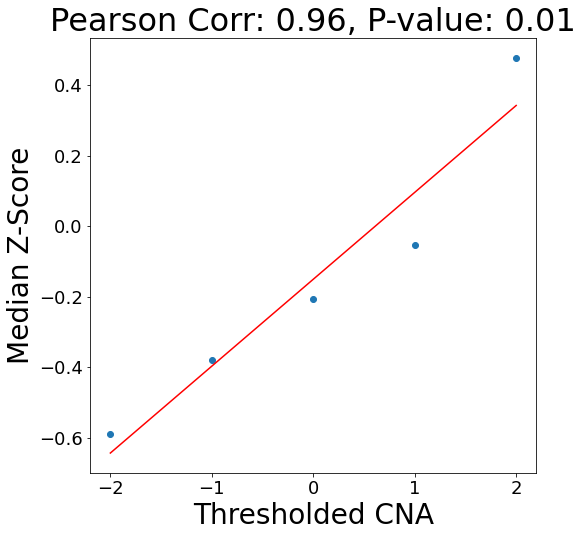

In [10]:
import os
import numpy as np
from scipy.stats import pearsonr
import pandas as pd
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import polyfit


processed_data_dir = "../data/processed"

cna = pd.concat(
    [pd.read_csv(os.path.join(processed_data_dir, cancer_type, "cna_thresholded.tsv"), sep="\t") for cancer_type in ["blca"]],
    axis=0
)

gex = pd.concat(
    [pd.read_csv(os.path.join(processed_data_dir, cancer_type, "gex.tsv"), sep="\t") for cancer_type in ["blca"]],
    axis=0
)

intersecting_sample_ids = sorted(list(set(cna["sample_id"].values).intersection(set(gex["sample_id"].values))))
intersecting_gene_ids = sorted(list(set(cna.columns.tolist()).intersection(gex.columns.tolist())))

cna = cna[cna["sample_id"].isin(intersecting_sample_ids)][intersecting_gene_ids].drop(columns=["sample_id"]).values
gex = gex[gex["sample_id"].isin(intersecting_sample_ids)][intersecting_gene_ids].drop(columns=["sample_id"]).values
z_scores = (gex - gex.mean(axis=0)) / gex.std(axis=0)

cna_1d = cna.ravel()
z_scores_1d = z_scores.ravel()

df = pd.DataFrame.from_dict({"cna": cna_1d, "z_score": z_scores_1d})
df = df.groupby("cna").agg({"z_score": "median"}).reset_index(drop=False)
pearson_corr, p_value = pearsonr(df["cna"].values, df["z_score"].values)

b, m = polyfit(df["cna"].values, df["z_score"].values, 1)

plt.figure(figsize=(8, 8))
plt.title(f"Pearson Corr: {np.round(pearson_corr, 2)}, P-value: {np.round(p_value, 2)}", fontsize=32)
plt.scatter(x=df["cna"].values, y=df["z_score"].values)
plt.plot(df["cna"].values, b + m * df["cna"].values, '-', color="red")
plt.xlabel("Thresholded CNA", fontsize=28)
plt.ylabel("Median Z-Score", fontsize=28)
plt.xticks([-2, -1, 0, 1, 2], fontsize=18)
plt.yticks(fontsize=18)
plt.show();


# Check whether there is a correlation between best predicted genes and AUGs/DDGs

In [1]:
import os
import pandas as pd
from collections import defaultdict
from scipy.stats import pearsonr

processed_data_dir = "../data/processed"
checkpoint_dir = "../checkpoints/1668990938_bcc52ffdd58647c194c4c000ffaa6e61"

cna = pd.read_csv(os.path.join(processed_data_dir, "blca", "cna_thresholded.tsv"), sep="\t")
gex = pd.read_csv(os.path.join(processed_data_dir, "blca", "gex.tsv"), sep="\t")

ground_truths = pd.read_csv(os.path.join(checkpoint_dir, "test_results", "ground_truths.tsv"), sep="\t")
predictions = pd.read_csv(os.path.join(checkpoint_dir, "test_results", "predictions.tsv"), sep="\t")

intersecting_sample_ids = sorted(list(set(cna["sample_id"].values).intersection(set(gex["sample_id"].values))))
intersecting_gene_ids = sorted(list(set(cna.columns).intersection(set(gex.columns))))
intersecting_gene_ids.remove("sample_id")

cna = cna[cna["sample_id"].isin(intersecting_sample_ids)][intersecting_gene_ids].values
gex = gex[gex["sample_id"].isin(intersecting_sample_ids)][intersecting_gene_ids].values
z_scores = (gex - gex.mean(axis=0)) / gex.std(axis=0)

gene_id_state_mapping = defaultdict(lambda: {
    "cna_aug_or_ddg": 0,
    "all": 0
})

for i in range(cna.shape[0]):
    for j, gene_id in enumerate(intersecting_gene_ids):
        current_cna = cna[i][j]
        current_z_score = z_scores[i][j]

        if (current_cna > 0 and current_z_score > 0) or (current_cna < 0 and current_z_score < 0):
            gene_id_state_mapping[gene_id]["cna_aug_or_ddg"] += 1
        
        gene_id_state_mapping[gene_id]["all"] += 1

for gene_id, gene_state in gene_id_state_mapping.items():
    gene_id_state_mapping[gene_id] = gene_id_state_mapping[gene_id]["cna_aug_or_ddg"] / gene_id_state_mapping[gene_id]["all"]

gene_predictabilities = pd.DataFrame.from_dict({"gene_id": list(gene_id_state_mapping.keys()), "gene_predictability": list(gene_id_state_mapping.values())})

gene_prediction_correlations = []
for gene_id in ground_truths.columns:
    gene_prediction_correlations.append((gene_id, pearsonr(ground_truths[gene_id], predictions[gene_id])[0]))

gene_prediction_correlations = pd.DataFrame(data=gene_prediction_correlations, columns=["gene_id", "gene_prediction_correlation"])

merged_df = pd.merge(left=gene_predictabilities, right=gene_prediction_correlations, how="inner", on="gene_id")

pearsonr(x=merged_df["gene_predictability"].values, y=merged_df["gene_prediction_correlation"].values)[0]



0.1725706280003717

In [2]:
import os
import numpy as np
from collections import defaultdict
from scipy.stats import pearsonr
import pandas as pd
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import polyfit


processed_data_dir = "../data/processed"

cna = pd.concat(
    [pd.read_csv(os.path.join(processed_data_dir, cancer_type, "cna_thresholded.tsv"), sep="\t") for cancer_type in ["blca"]],
    axis=0
)

gex = pd.concat(
    [pd.read_csv(os.path.join(processed_data_dir, cancer_type, "gex.tsv"), sep="\t") for cancer_type in ["blca"]],
    axis=0
)

intersecting_sample_ids = sorted(list(set(cna["sample_id"].values).intersection(set(gex["sample_id"].values))))
intersecting_gene_ids = sorted(list(set(cna.columns).intersection(set(gex.columns))))
intersecting_gene_ids.remove("sample_id")

cna = cna[cna["sample_id"].isin(intersecting_sample_ids)][intersecting_gene_ids]
gex = gex[gex["sample_id"].isin(intersecting_sample_ids)][intersecting_gene_ids]
z_scores = ((gex - gex.mean(axis=0)) / gex.std(axis=0))

gene_id_state_mapping = defaultdict(lambda: {
    "cna_amplified_gex_upregulated": 0,
    "cna_amplified_gex_downregulated": 0,
    "cna_amplified_gex_no_change": 0,

    "cna_no_change_gex_upregulated": 0,
    "cna_no_change_gex_downregulated": 0,
    "cna_no_change_gex_no_change": 0,

    "cna_deleted_gex_upregulated": 0,
    "cna_deleted_gex_downregulated": 0,
    "cna_deleted_gex_no_change": 0,
})

for gene_id in intersecting_gene_ids:
    cna_i = cna[gene_id].values.ravel()
    z_scores_i = z_scores[gene_id].values.ravel()

    for j in range(len(cna_i)):
        cna_ij = cna_i[j]
        z_scores_ij = z_scores_i[j]
        if cna_ij > 0:
            if z_scores_ij > 0:
                gene_id_state_mapping[gene_id]["cna_amplified_gex_upregulated"] += 1
            elif z_scores_ij < 0:
                gene_id_state_mapping[gene_id]["cna_amplified_gex_downregulated"] += 1
            elif z_scores_ij == 0:
                gene_id_state_mapping[gene_id]["cna_amplified_gex_no_change"] += 1
        elif cna_ij < 0:
            if z_scores_ij > 0:
                gene_id_state_mapping[gene_id]["cna_deleted_gex_upregulated"] += 1
            elif z_scores_ij < 0:
                gene_id_state_mapping[gene_id]["cna_deleted_gex_downregulated"] += 1
            elif z_scores_ij == 0:
                gene_id_state_mapping[gene_id]["cna_deleted_gex_no_change"] += 1
        else:
            if z_scores_ij > 0:
                gene_id_state_mapping[gene_id]["cna_no_change_gex_upregulated"] += 1
            elif z_scores_ij < 0:
                gene_id_state_mapping[gene_id]["cna_no_change_gex_downregulated"] += 1
            elif z_scores_ij == 0:
                gene_id_state_mapping[gene_id]["cna_no_change_gex_no_change"] += 1

data = []
for gene_id, gene_states_dict in gene_id_state_mapping.items():
    data.append((gene_id,
                 gene_states_dict["cna_amplified_gex_upregulated"],
                 gene_states_dict["cna_amplified_gex_downregulated"],
                 gene_states_dict["cna_amplified_gex_no_change"],
                 gene_states_dict["cna_deleted_gex_upregulated"],
                 gene_states_dict["cna_deleted_gex_downregulated"],
                 gene_states_dict["cna_deleted_gex_no_change"],
                 gene_states_dict["cna_no_change_gex_upregulated"],
                 gene_states_dict["cna_no_change_gex_downregulated"],
                 gene_states_dict["cna_no_change_gex_no_change"]))

gene_predictabilities = pd.DataFrame(data=data, columns=["gene_id",
                                                         "cna_amplified_gex_upregulated",
                                                         "cna_amplified_gex_downregulated",
                                                         "cna_amplified_gex_no_change",
                                                         "cna_deleted_gex_upregulated",
                                                         "cna_deleted_gex_downregulated",
                                                         "cna_deleted_gex_no_change",
                                                         "cna_no_change_gex_upregulated",
                                                         "cna_no_change_gex_downregulated",
                                                         "cna_no_change_gex_no_change"])
gene_predictabilities = gene_predictabilities.set_index("gene_id")
sum_rows = gene_predictabilities.values.sum(axis=1).reshape(-1, 1)

gene_predictabilities = pd.DataFrame(data=gene_predictabilities.values / sum_rows, columns=gene_predictabilities.columns, index=gene_predictabilities.index.values)

gene_predictabilities["gene_predictability"] = gene_predictabilities["cna_amplified_gex_upregulated"].values + gene_predictabilities["cna_deleted_gex_downregulated"].values
gene_predictabilities = gene_predictabilities[["gene_predictability"]].sort_values(by="gene_predictability", ascending=False)

gene_predictabilities


,gene_predictability
80185,0.623762
84549,0.621287
1029,0.618812
2961,0.616337
79648,0.606436
...,...
285242,0.049505
6274,0.049505
4826,0.044554
78997,0.042079


In [3]:
import os
import pandas as pd
from scipy.stats import pearsonr

checkpoint_dir = "../checkpoints/1668991987_c365f1939ced43f2bea10f07f5a6e4c1"

ground_truths = pd.read_csv(os.path.join(checkpoint_dir, "test_results", "ground_truths.tsv"), sep="\t")
predictions = pd.read_csv(os.path.join(checkpoint_dir, "test_results", "predictions.tsv"), sep="\t")

data = []
for entrezgene_id in ground_truths.columns:
    gene_corr = pearsonr(x=ground_truths[entrezgene_id].values, y=predictions[entrezgene_id].values)[0]
    data.append((entrezgene_id, gene_corr))
gene_prediction_correlations = pd.DataFrame(data=data, columns=["entrezgene_id", "gene_prediction_correlation"])
gene_prediction_correlations = gene_prediction_correlations.set_index("entrezgene_id")
gene_prediction_correlations


,gene_prediction_correlation
entrezgene_id,
1,0.163321
100,0.363095
1000,0.607429
10000,0.513228
10001,0.665855
...,...
9991,0.612913
9992,0.482831
9993,0.585263


In [5]:
merged_df = pd.merge(left=gene_predictabilities, right=gene_prediction_correlations, how="inner", left_index=True, right_index=True)
pearsonr(x=merged_df["gene_predictability"].values, y=merged_df["gene_prediction_correlation"].values)[0]


0.32266721664856035

,cna_amplified_gex_upregulated,cna_amplified_gex_downregulated,cna_amplified_gex_no_change,cna_deleted_gex_upregulated,cna_deleted_gex_downregulated,cna_deleted_gex_no_change,cna_no_change_gex_upregulated,cna_no_change_gex_downregulated,cna_no_change_gex_no_change
10995,0.422278,0.320033,0.0,0.002494,0.022444,0.0,0.029925,0.202826,0.0
14068,0.393184,0.305902,0.0,0.001663,0.030756,0.0,0.023275,0.245220,0.0
13562,0.387365,0.330840,0.0,0.001663,0.041563,0.0,0.016625,0.221945,0.0
13850,0.387365,0.330840,0.0,0.001663,0.041563,0.0,0.031588,0.206983,0.0
3067,0.386534,0.361596,0.0,0.000000,0.018288,0.0,0.014963,0.218620,0.0
...,...,...,...,...,...,...,...,...,...
14000,0.004156,0.116376,0.0,0.019119,0.502909,0.0,0.012469,0.344971,0.0
7888,0.003325,0.045719,0.0,0.064007,0.578554,0.0,0.038238,0.270158,0.0
3267,0.002494,0.056525,0.0,0.039069,0.581879,0.0,0.020781,0.299252,0.0
13409,0.001663,0.128845,0.0,0.049875,0.423940,0.0,0.019950,0.375727,0.0


(array([  3.,   0.,   0.,  46.,   0.,   0., 216.,   0.,   0., 233.]),
 array([-1. , -0.7, -0.4, -0.1,  0.2,  0.5,  0.8,  1.1,  1.4,  1.7,  2. ]),
 <BarContainer object of 10 artists>)

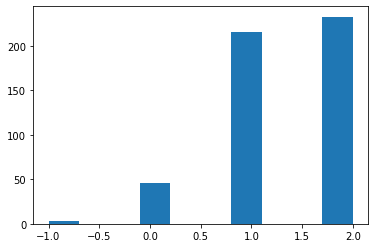

In [15]:
import matplotlib.pyplot as plt

plt.hist(cna)

In [16]:
161/(161+271)

0.3726851851851852